<a href="https://colab.research.google.com/github/belladoeswork/dcgan/blob/main/dc_datagen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install ctgan

In [3]:
!pip install table_evaluator

In [4]:
#upload file

from google.colab import files

uploaded = files.upload()

Saving wpbc_data.csv to wpbc_data (2).csv


In [5]:
import pandas as pd
df = pd.read_csv('wpbc_data.csv')


In [6]:
data= df.copy()

In [7]:
data.head(3)

,ID,Time,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,tumor_size,lymph_node_status,Outcome
0,119513,31,18.02,27.60,117.5,1013.0,0.09489,0.1036,0.1086,0.07055,...,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5.0,N
1,8423,61,17.99,10.38,122.8,1001.0,0.11840,0.2776,0.3001,0.14710,...,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2.0,N
2,842517,116,21.37,17.44,137.5,1373.0,0.08836,0.1189,0.1255,0.08180,...,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0.0,N


In [8]:
data.isnull().sum()

ID                    0
Time                  0
radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
tumor_size            0
lymph_node_status     4
Outcome               0
dtype: int64

In [9]:
#filling the missing values in lymph_node_status
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each column with categorical data
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col].astype(str))

lr = LinearRegression()
data.head()
testdata = data[data['lymph_node_status'].isnull()==True]
traindata = data[data['lymph_node_status'].isnull()==False]
y = traindata['lymph_node_status']
traindata.drop("lymph_node_status",axis=1,inplace=True)
lr.fit(traindata,y)
testdata.drop("lymph_node_status",axis=1,inplace=True)
pred = lr.predict(testdata)
#update dataset
data.loc[data['lymph_node_status'].isnull(), 'lymph_node_status'] = pred

<ipython-input-9-b3d8fd219f1c>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindata.drop("lymph_node_status",axis=1,inplace=True)
<ipython-input-9-b3d8fd219f1c>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdata.drop("lymph_node_status",axis=1,inplace=True)


In [10]:
data.isnull().sum()

ID                    0
Time                  0
radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
tumor_size            0
lymph_node_status     0
Outcome               0
dtype: int64

Gen new columns

In [11]:
data.isna().sum()


ID                    0
Time                  0
radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
tumor_size            0
lymph_node_status     0
Outcome               0
dtype: int64

In [12]:
# new_features = pd.DataFrame({
#     'initial_procedure': np.zeros(len(df)),
#     'additional_procedure': np.zeros(len(df))
# })


In [13]:
# df = pd.concat([data, new_features], axis=1)


In [14]:
!pip install tabgan
!pip install simple-colors

In [15]:
from tabgan.sampler import OriginalGenerator, GANGenerator
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from simple_colors import *

from sklearn.metrics import classification_report,f1_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from itertools import cycle, chain
from IPython.display import display_html


/usr/local/lib/python3.10/dist-packages/_ctgan/synthesizer.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


parameters:

* gen_x_times: amount of synthetic data to generate as a multiple of the real data size.
* cat_cols: list of categorical columns in the data.
* bot_filter_quantile, top_filter_quantile: These parameters are used to filter out extreme values in the data.
* is_post_process: If set to True, post-processing is done on the generated data to make it more similar to the real data.
* adversarial_model_params: used to train the adversarial model in the GAN.
  * metrics: metric used to evaluate the performance of the adversarial model.
  * max_depth: the maximum depth of the trees (levels below the root) in the adversarial model.
  * max_bin: maximum number of bins used for binning (grouping ie 10-20,20-40) continuous features and for training the model.
  * learning_rate: learning rate for the model. how much the model learns from each batch of data. how much to change the model in response to the estimated error each time the model weights are updated. If the learning rate is very small, the model will need many updates to converge to the best values. This can make the training process very slow. if the learning rate is very large, the updates may be too big, and the model may overshoot the optimal values or even diverge.
  * random_state: sets the seed for the random number generator. for reproducibility.
  * n_estimators: number of trees in the adversarial model. More trees can lead to better performance, but also to longer training times and potentially overfitting.


* pregeneration_frac: fraction of the real data to use for pre-training the generator.
* only_generated_data: If set to False, the function returns a mix of real and generated data. If set to True, it returns only generated data.
* gen_params: parameters used to control the training of the GAN.
* x_GAN, y_GAN: generated synthetic data.

* f1_score: measure model's accuracy that considers both precision and recall. best possible F1 score is 1.0, indicating perfect precision and recall, and the worst is 0.0, if either the precision or the recall is zero.
* Precision: number of true positive results divided by the number of all positive results, including those not identified correctly, and
* recall: number of true positive results divided by the number of all samples that should have been identified as positive.


*
*
*



In [16]:
#helper functions


# generate synth data
def Datagen(X_train_real,y_train_real,X_test_real):

  x_GAN, y_GAN = GANGenerator(gen_x_times=1.6, cat_cols=None,
            bot_filter_quantile=0.001, top_filter_quantile=0.999, is_post_process=True,
            adversarial_model_params={
                "metrics": "AUC", "max_depth": 2, "max_bin": 100,
                "learning_rate": 0.02, "random_state": 42, "n_estimators": 500,
            }, pregeneration_frac=2, only_generated_data=False,
            gen_params = {"batch_size": 500, "patience": 25, "epochs" : 1000,}).generate_data_pipe(X_train_real, y_train_real, X_test_real, )
  return x_GAN,y_GAN


# model performance report
def Model_Eval(X_train,y_train,X_test,y_test):

  classifiers = {
      "Support Vector Machine":SVC(kernel="linear", C=0.025),
      "Random Forest":RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    "Mulilaryer Perceptron": MLPClassifier(alpha=1, max_iter=1000),
      "Adaboost":AdaBoostClassifier()}

  for modelname, clf in classifiers.items():
    training=clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    print(green(modelname,'bold'))
    print(classification_report(y_test, y_pred))
    print(red('f1score',['bold','underlined']),f1_score(y_test, clf.predict(X_test), average='macro'))



# side by side view of real and synth data
def display_side_by_side(*args,titles=cycle([''])):

    html_str=''
    for df,title in zip(args, chain(titles,cycle([''])) ):
        html_str+=''
        html_str+=f'{title}'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+=''
    display_html(html_str,raw=True)


# encode cat var
def encode(df,*columns):
  import matplotlib.pyplot as plt
  import seaborn as sns
  cols=[]
  for i in columns:
      cols.append(i)
  encode_type=input('Enter encode type')
  if encode_type=='label':
      from sklearn.preprocessing import LabelEncoder
      le=LabelEncoder()
      for i in cols:
          df[i]=le.fit_transform(df[[i]])
      return df
  elif encode_type=='ordinal':
      for i in cols:

          ord_dict={}
          print(i)
          n=int(input("enter a number of unique values present in the column: "))
          for j in range(n):
              key=input('Unique value for the column')
              value=int(input('Enter ordinal number for the value'))
              ord_dict[key]=value
          x=df[i].map(ord_dict)
          df[i]=x
      return df
  elif encode_type=='one-hot':
      df2=pd.get_dummies(df,columns=cols)

      return df2
  else:
      print('Invalid encode type, select one from label,ordinal,one-hot')



In [17]:
#reading data from real data for training/testin

df=data.drop('ID', axis=1)
df.head(5)
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
# train test split for CGans input
X_train_real, X_test_real, y_train_real, y_test_real = sklearn.model_selection.train_test_split(x,y, test_size=0.33, random_state=42)

#
X_train_real=pd.DataFrame(X_train_real)
y_train_real=pd.DataFrame(y_train_real)
X_test_real=pd.DataFrame(X_test_real)


Synth data gen

In [18]:
# create synth samples
x_GAN, y_GAN=Datagen(X_train_real,y_train_real,X_test_real)

Fitting CTGAN transformers for each column:   0%|          | 0/34 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/1000 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 53, number of negative: 52
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000302 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1140
[LightGBM] [Info] Number of data points in the train set: 105, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504762 -> initscore=0.019048
[LightGBM] [Info] Start training from score 0.019048
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

Models Evaluation With Orignal Data


In [19]:
# df.head(3)

In [20]:
# print(y_train_real.nunique())

In [21]:
orignal=Model_Eval(X_train_real,y_train_real,X_test_real,y_test_real)


Support Vector Machine
              precision    recall  f1-score   support

           0       0.86      0.91      0.88        53
           1       0.50      0.38      0.43        13

    accuracy                           0.80        66
   macro avg       0.68      0.65      0.66        66
weighted avg       0.79      0.80      0.79        66

f1score 0.6577582768248904
Random Forest
              precision    recall  f1-score   support

           0       0.82      0.96      0.89        53
           1       0.50      0.15      0.24        13

    accuracy                           0.80        66
   macro avg       0.66      0.56      0.56        66
weighted avg       0.76      0.80      0.76        66

f1score 0.5611253196930946
Mulilaryer Perceptron
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        53
           1       0.50      0.46      0.48        13

    accuracy                           0.80        66
   macro avg   

Models Evaluation With synth data


In [22]:
Synth=Model_Eval(x_GAN,y_GAN,X_test_real,y_test_real)


Support Vector Machine
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        53
           1       0.33      0.31      0.32        13

    accuracy                           0.74        66
   macro avg       0.58      0.58      0.58        66
weighted avg       0.73      0.74      0.74        66

f1score 0.5805607476635514
Random Forest
              precision    recall  f1-score   support

           0       0.82      0.70      0.76        53
           1       0.24      0.38      0.29        13

    accuracy                           0.64        66
   macro avg       0.53      0.54      0.52        66
weighted avg       0.71      0.64      0.66        66

f1score 0.524609843937575
Mulilaryer Perceptron
              precision    recall  f1-score   support

           0       0.90      0.83      0.86        53
           1       0.47      0.62      0.53        13

    accuracy                           0.79        66
   macro avg    

Orignal vs synth data


In [23]:
display_side_by_side(x.head(5),x_GAN.head(5), titles=['Orignal','Synth'])

,Time,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,tumor_size,lymph_node_status
0,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,0.07055,0.1865,0.06333,0.6249,1.8900,3.972,71.55,0.004433,0.01421,0.03233,0.009854,0.01694,0.003495,21.63,37.08,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5.0
1,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2.0
2,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,0.2333,0.06010,0.5854,0.6105,3.928,82.15,0.006167,0.03449,0.03300,0.018050,0.03094,0.005039,24.90,20.98,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0.0
3,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0.0
4,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0.0
,Time,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,tumor_size,lymph_node_status
0,48,19.80,21.56,129.7,1230.0,0.09383,0.1306,0.1272,0.08691,0.2094,0.05581,0.9553,1.186,6.487,124.40,0.006804,0.03169,0.03446,0.01712,0.01897,0.004045,25.73,28.64,170.3,2009.0,0.1353,0.3235,0.3617,0.1820,0.3070,0.08255,2.6,0.0
1,10,18.77,21.43,122.9,1092.0,0.09116,0.1402,0.1060,0.06090,0.1953,0.06083,0.6422,1.530,4.369,88.25,0.007548,0.03897,0.03914,0.01816,0.02168,0.004445,24.54,34.37,161.1,1873.0,0.1498,0.4827,0.4634,0.2048,0.3679,0.09870,2.0,0.0
2,5,19.18,22.49,127.5,1148.0,0.08523,0.1428,0.1114,0.06772,0.1767,0.05529,0.4357,1.073,3.833,54.22,0.005524,0.03698,0.02706,0.01221,0.01415,0.003397,23.36,32.06,166.4,1688.0,0.1322,0.5601,0.3865,0.1708,0.3193,0.09221,3.0,1.0
3,47,18.82,21.97,123.7,1110.0,0.10180,0.1389,0.1594,0.08744,0.1943,0.06132,0.8191,1.931,4.493,103.90,0.008074,0.04088,0.05321,0.01834,0.02383,0.004515,22.66,30.93,145.3,1603.0,0.1390,0.3463,0.3912,0.1708,0.3007,0.08314,1.0,0.0


In [24]:
# KDE plot
x_GAN['Data Source']='Synth' # adding labels
x['Data Source']='Original'
df_compare=pd.concat([x,x_GAN]) # combining fake and real data
df_compare = df_compare.reset_index() # reindexing the dataframe

KDE plot is for visualizing the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

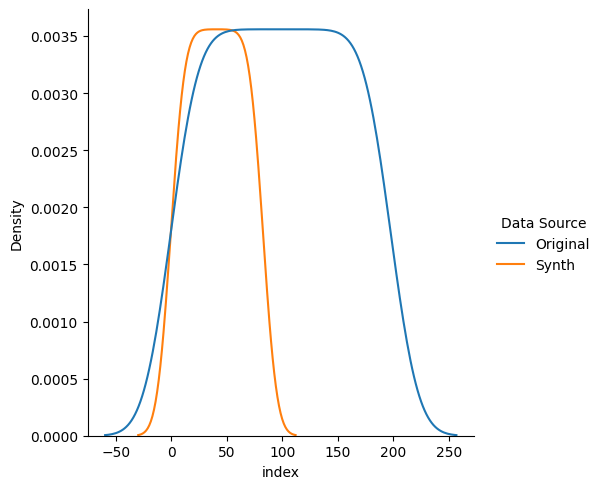

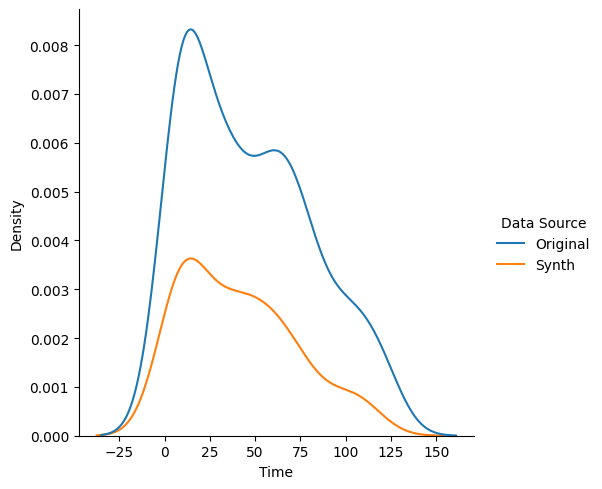

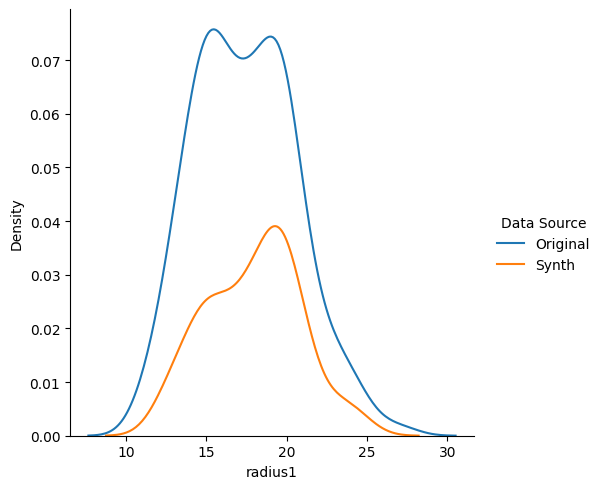

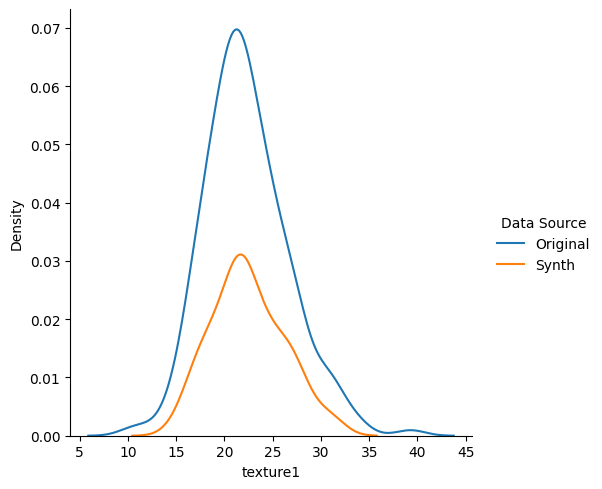

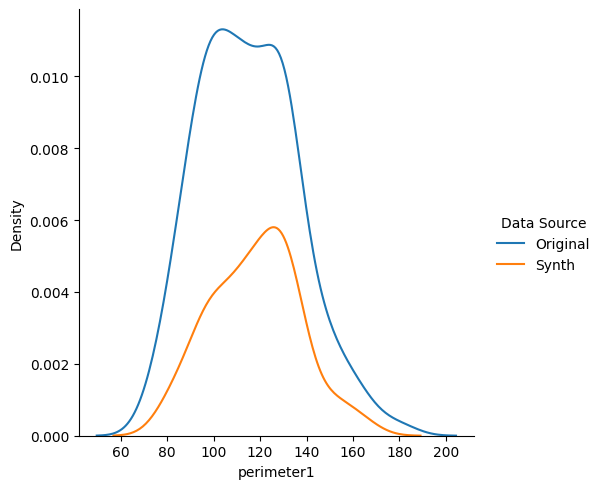

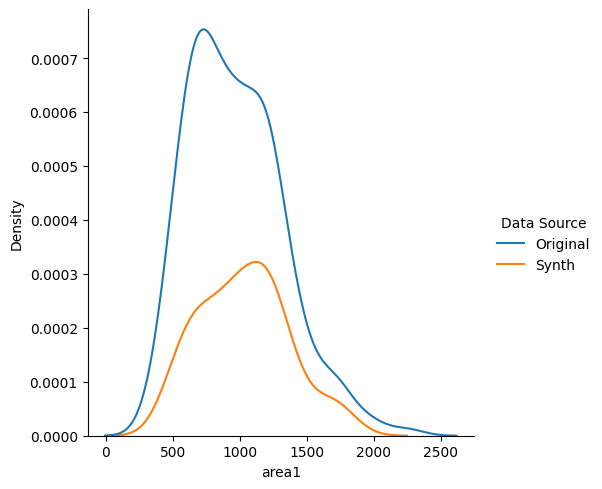

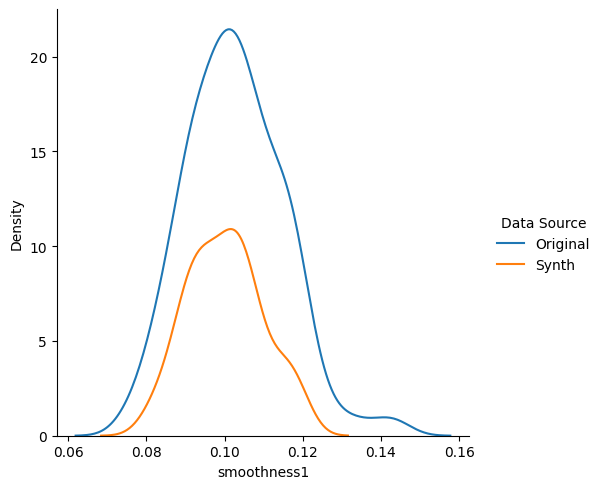

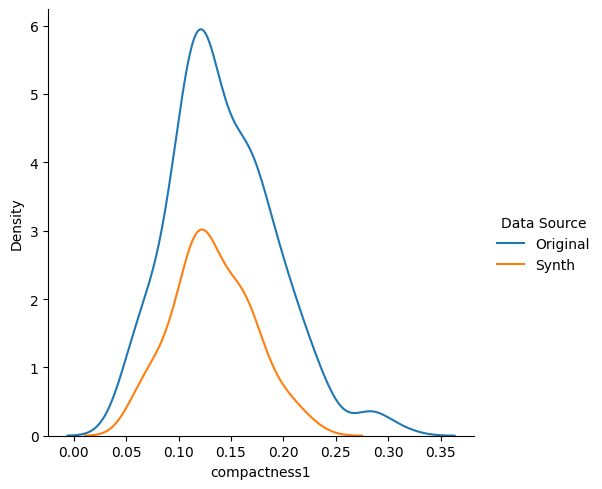

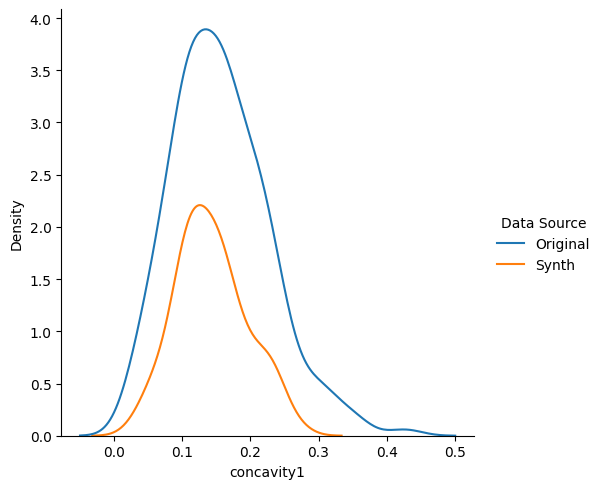

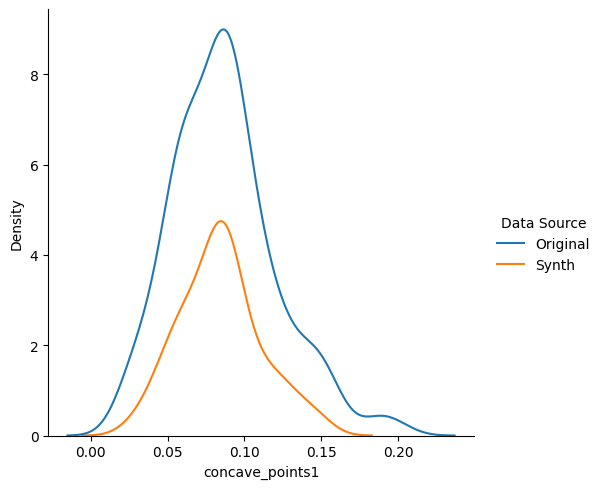

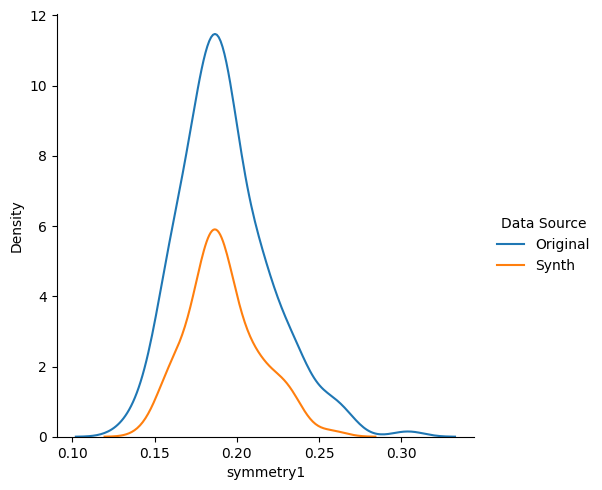

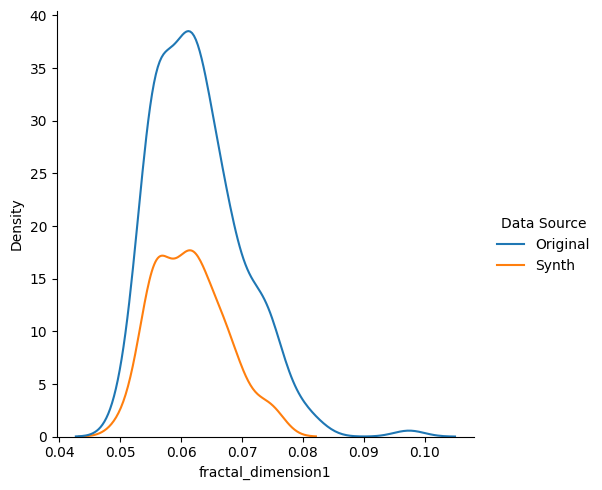

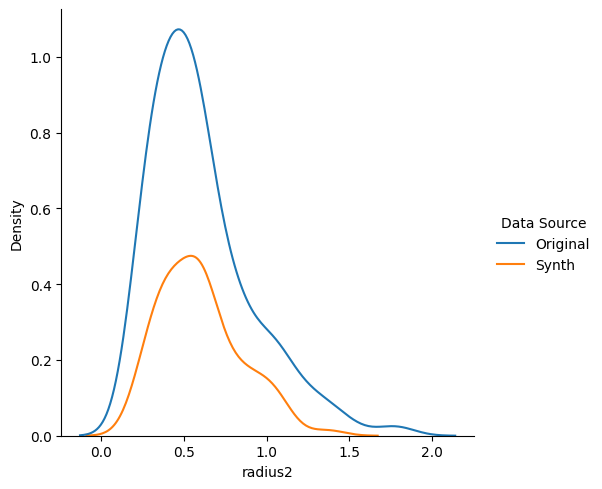

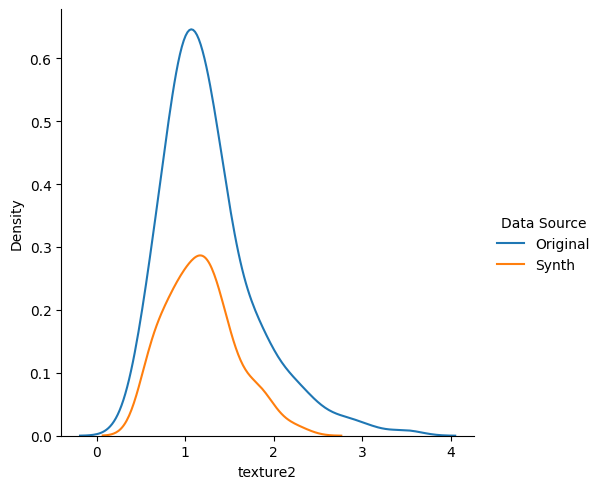

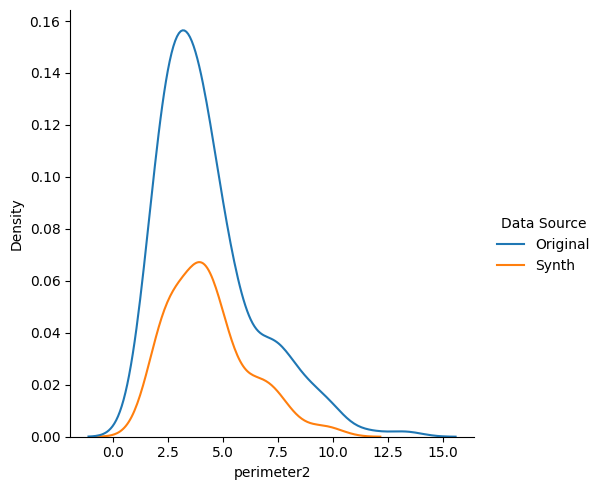

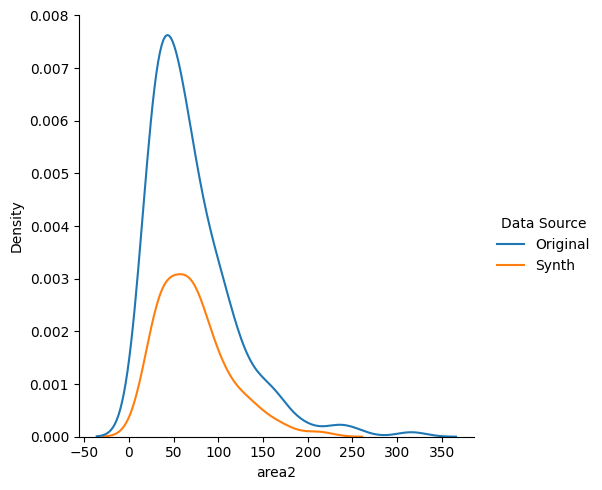

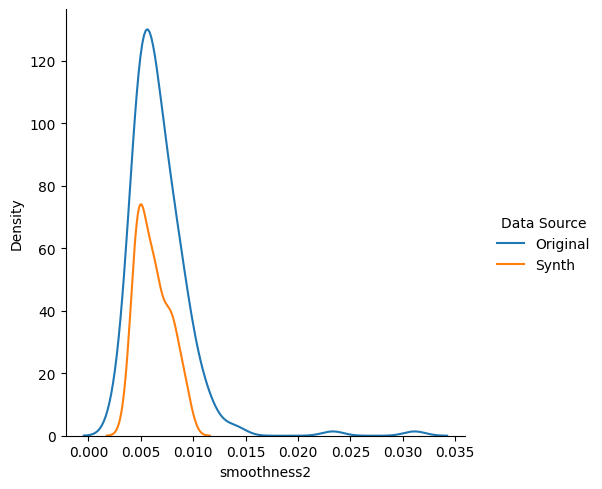

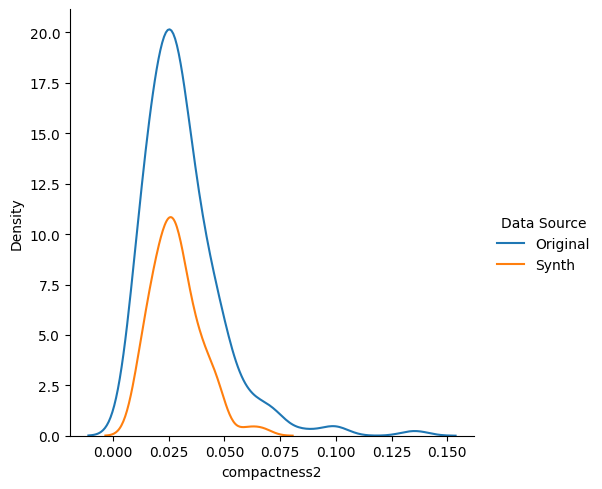

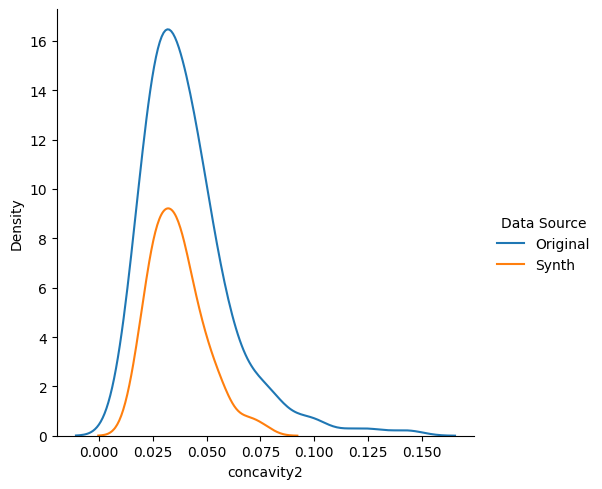

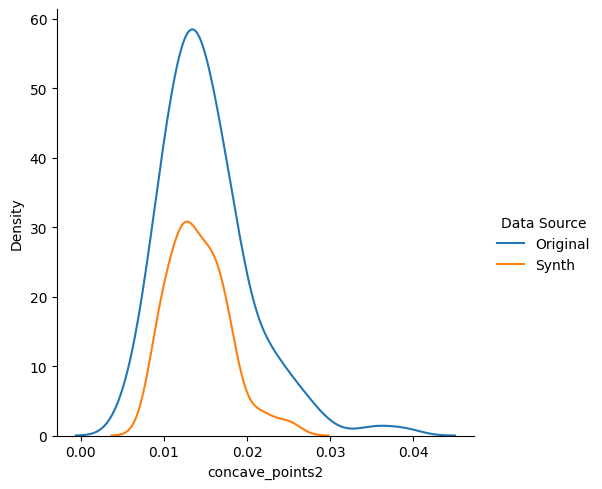

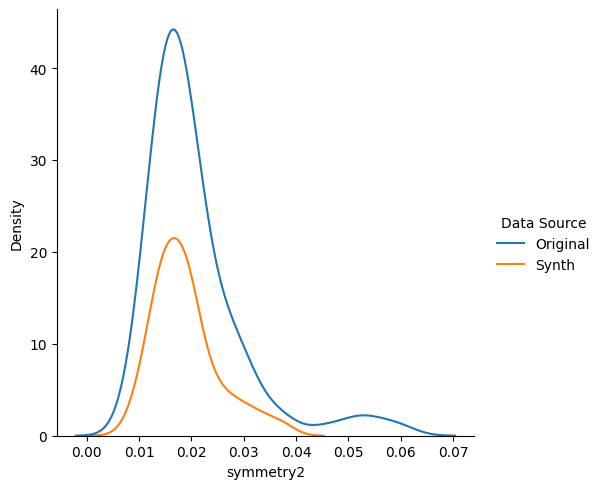

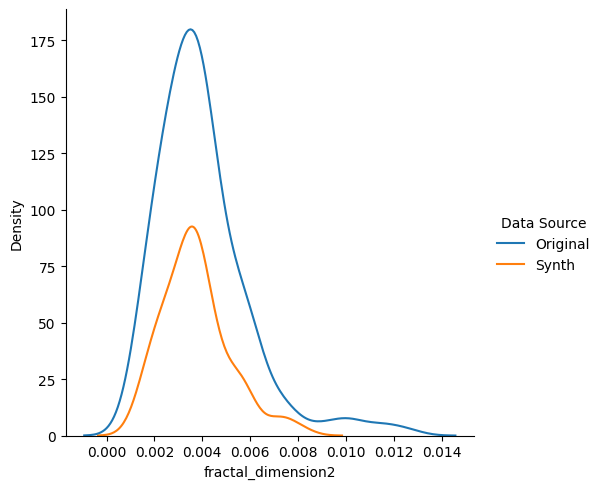

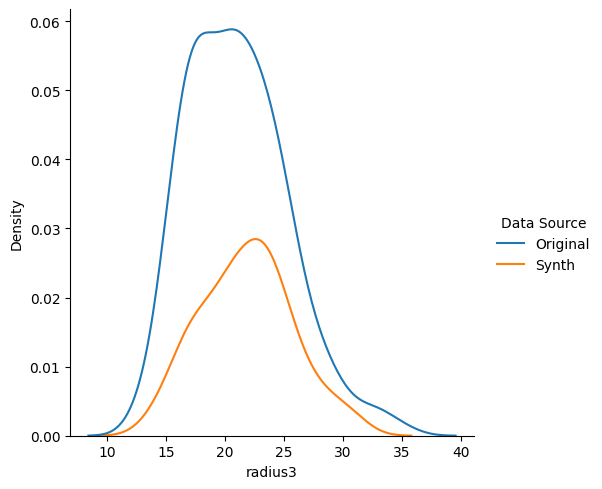

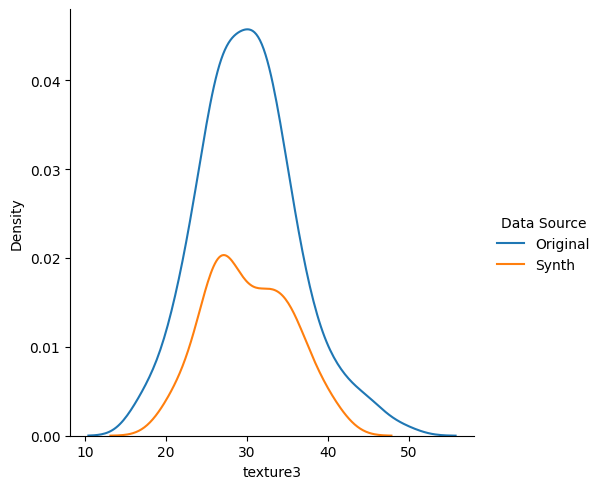

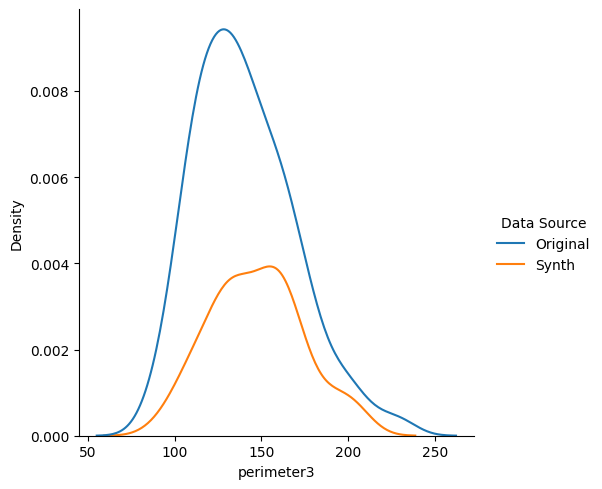

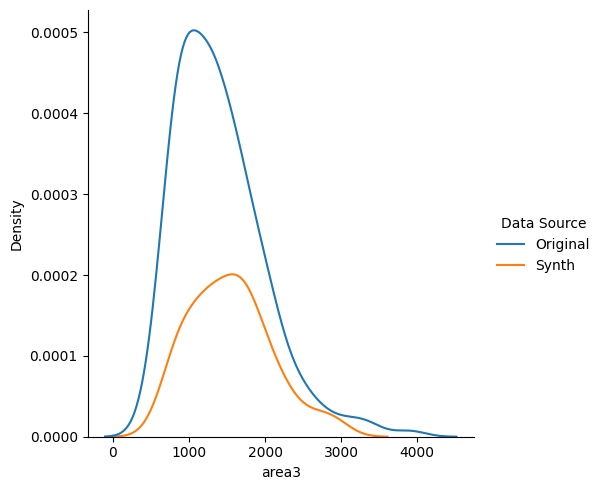

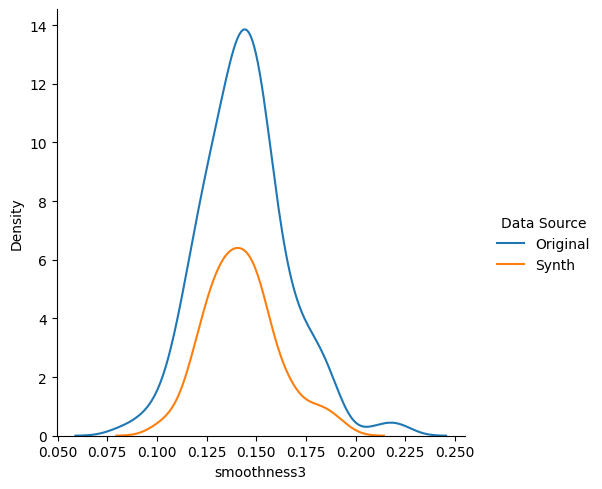

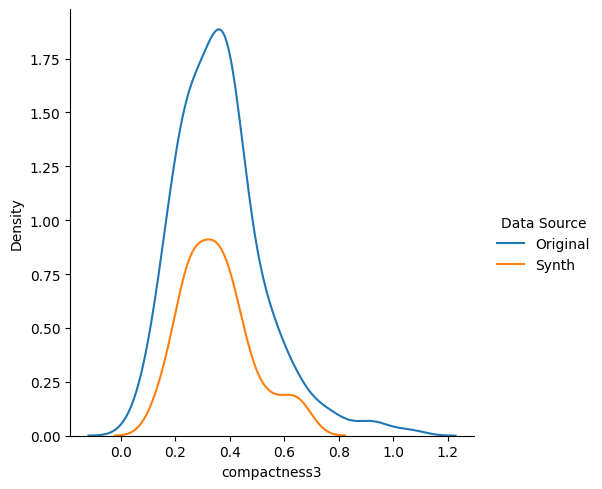

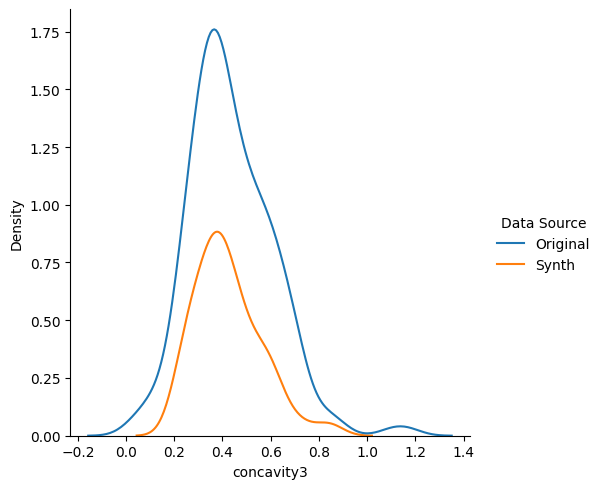

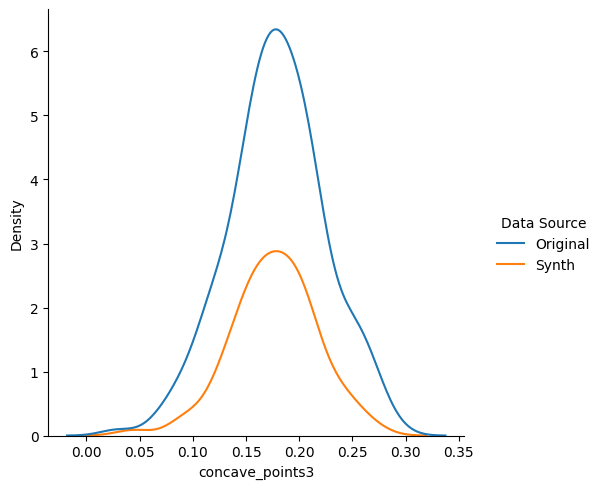

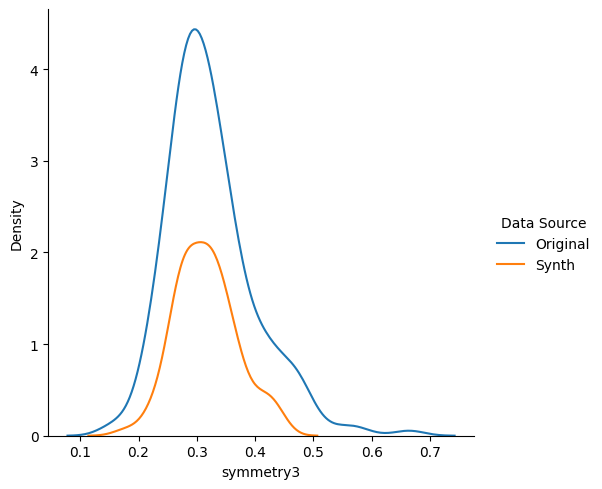

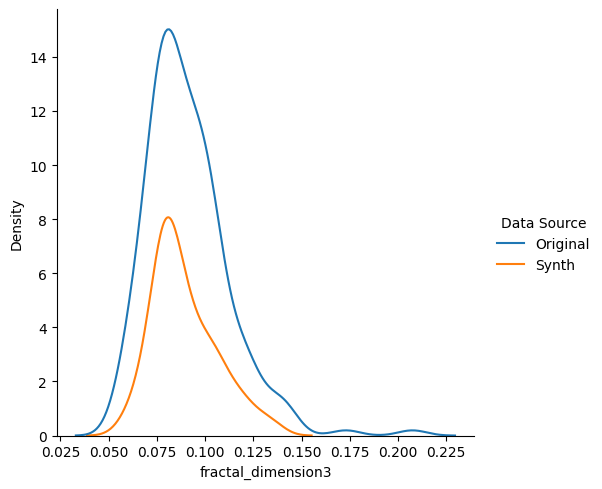

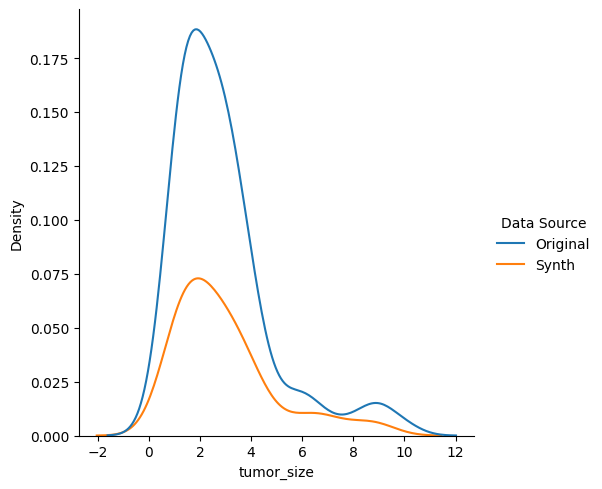

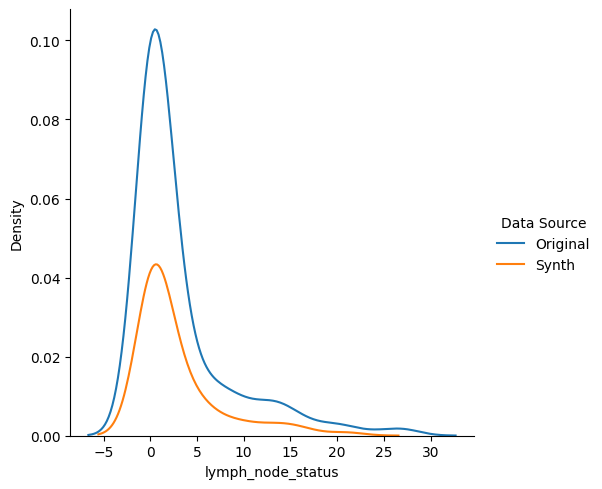

In [25]:
for column_name, column_series in df_compare.iloc[:, :-1].items():
     sns.displot(df_compare, x=df_compare[column_name], hue="Data Source", kind="kde")

Datatypes of Orignal and synth data

In [26]:
print("Orignal dtypes")
print(x.dtypes)
print("GAN dtypes")
print(x_GAN.dtypes)

Orignal dtypes
Time                    int64
radius1               float64
texture1              float64
perimeter1            float64
area1                 float64
smoothness1           float64
compactness1          float64
concavity1            float64
concave_points1       float64
symmetry1             float64
fractal_dimension1    float64
radius2               float64
texture2              float64
perimeter2            float64
area2                 float64
smoothness2           float64
compactness2          float64
concavity2            float64
concave_points2       float64
symmetry2             float64
fractal_dimension2    float64
radius3               float64
texture3              float64
perimeter3            float64
area3                 float64
smoothness3           float64
compactness3          float64
concavity3            float64
concave_points3       float64
symmetry3             float64
fractal_dimension3    float64
tumor_size            float64
lymph_node_status     flo

In [2]:
H1 = ['Age at Diagnosis (Calculated)',
      'Pathological Grade',
      'Gender',
      'HPV/P16 status',
      'T-category',
      'N-category',
      'N-category_8th_edition',
      'AJCC 7th edition',
      'AJCC 8th edition',
      'Smoking status at Diagnosis (Never/Former/Current)',
      'Smoking status (Packs/Year)',
      'Aspiration rate Pre-therapy',
      'Num Affected Lymph nodes',
      'R Laterality',
      'L Laterality',
      'BOT subsite',
      'Tonsil subsite',
      'Soft Palate subsite',
      'GPS subsite',
      'White/Caucasian',
      'Hispanic/Latino',
      'African American/Black',
      'Asian',
      'Native American']
A1 = 'Decision 1 (Induction Chemo) Y/N'
S2 = ['Prescribed Chemo (Single/doublet/triplet/quadruplet/none/NOS)',
                'Chemo Modification (Y/N)',
                'Dose modified',
                'Dose delayed',
                'Dose cancelled',
                'Regimen modification',
                'DLT (Y/N)',
                'DLT_Dermatological',
                'DLT_Neurological',
                'DLT_Gastrointestinal',
                'DLT_Hematological',
                'DLT_Nephrological',
                'DLT_Vascular',
                'DLT_Infection (Pneumonia)',
                'DLT_Other',
                'DLT_Grade',
                'No imaging (0=N, 1=Y)',
                'CR Primary',
                'CR Nodal',
                'PR Primary',
                'PR Nodal',
                'SD Primary',
                'SD Nodal']
H2 = H1 + [A1] + S2
A2 = 'Decision 2 (CC / RT alone)'
S3 =  ['CC Platinum',
                'CC Cetuximab',
                'CC Others',
                'CC modification (Y/N)',
                'CR Primary 2',
                'CR Nodal 2',
                'PR Primary 2',
                'PR Nodal 2',
                'SD Primary 2',
                'SD Nodal 2',
                'DLT_Dermatological 2',
                'DLT_Neurological 2',
                'DLT_Gastrointestinal 2',
                'DLT_Hematological 2',
                'DLT_Nephrological 2',
                'DLT_Vascular 2',
                'DLT_Other 2']
H3 = H2 + [A2] + S3
A3 = 'Decision 3 Neck Dissection (Y/N)'
Y = ['Overall Survival (4 Years)', 'Feeding tube 6m', 'Aspiration rate Post-therapy', 'Dysphagia']
decisions = [A1, A2, A3]
histories = [H1, H2, H3]
states = [S2, S3, Y]
action_values = [(-1, 1), (-1, 1), (-1, 1)]

# histories before preprocessing
H1_prepr = ['Age at Diagnosis (Calculated)',
            'Pathological Grade',
            'Gender',
            'HPV/P16 status',
            'T-category',
            'N-category',
            'N-category_8th_edition',
            'AJCC 7th edition',
            'AJCC 8th edition',
            'Smoking status at Diagnosis (Never/Former/Current)',
            'Smoking status (Packs/Year)',
            'Aspiration rate Pre-therapy',
            'Affected Lymph node',
            'Tm Laterality (R/L)',
            'Tumor subsite (BOT/Tonsil/Soft Palate/Pharyngeal wall/GPS/NOS)',
            'Race']
S2_prepr = ['Prescribed Chemo (Single/doublet/triplet/quadruplet/none/NOS)',
                'Chemo Modification (Y/N)',
                'Modification Type (0= no dose adjustment, 1=dose modified, 2=dose delayed, 3=dose cancelled, 4=dose delayed & modified, 5=regimen modification, 9=unknown)',
                'DLT (Y/N)',
                'DLT_Type',
                'DLT_Dermatological',
                'DLT_Neurological',
                'DLT_Gastrointestinal',
                'DLT_Hematological',
                'DLT_Nephrological',
                'DLT_Vascular',
                'DLT_Infection (Pneumonia)',
                'DLT_Grade',
                'No imaging (0=N, 1=Y)',
                'CR Primary',
                'CR Nodal',
                'PR Primary',
                'PR Nodal',
                'SD Primary',
                'SD Nodal']
H2_prepr = H1_prepr + [A1] + S2_prepr
S3_prepr =  ['CC Regimen(0= none, 1= platinum based, 2= cetuximab based, 3= others, 9=unknown)',
                'CC modification (Y/N)',
                'CR Primary 2',
                'CR Nodal 2',
                'PR Primary 2',
                'PR Nodal 2',
                'SD Primary 2',
                'SD Nodal 2',
                'DLT 2']
H3_prepr = H2_prepr + [A2] + S3_prepr

In [6]:
# Combine all lists
all_columns = H1 + [A1] + S2 + H2 + [A2] + S3 + Y + H1_prepr + S2_prepr + H2_prepr + S3_prepr + H3_prepr

# Get unique columns
unique_columns = list(set(all_columns))

# Print unique columns
print(unique_columns)


['Aspiration rate Pre-therapy', 'T-category', 'DLT_Hematological', 'AJCC 8th edition', 'DLT_Gastrointestinal', 'DLT_Hematological 2', 'Aspiration rate Post-therapy', 'Chemo Modification (Y/N)', 'PR Primary 2', 'Dose cancelled', 'SD Nodal 2', 'Gender', 'DLT_Infection (Pneumonia)', 'PR Nodal 2', 'CC Others', 'DLT_Nephrological 2', 'HPV/P16 status', 'Feeding tube 6m', 'DLT 2', 'CC modification (Y/N)', 'DLT_Gastrointestinal 2', 'Prescribed Chemo (Single/doublet/triplet/quadruplet/none/NOS)', 'Hispanic/Latino', 'African American/Black', 'Smoking status (Packs/Year)', 'SD Primary 2', 'L Laterality', 'DLT_Grade', 'Smoking status at Diagnosis (Never/Former/Current)', 'BOT subsite', 'AJCC 7th edition', 'CC Regimen(0= none, 1= platinum based, 2= cetuximab based, 3= others, 9=unknown)', 'Dose delayed', 'CR Primary', 'DLT_Dermatological 2', 'Decision 2 (CC / RT alone)', 'Dysphagia', 'PR Primary', 'Overall Survival (4 Years)', 'DLT_Vascular 2', 'CC Platinum', 'SD Primary', 'No imaging (0=N, 1=Y)', 

In [ ]:
['Aspiration rate Pre-therapy', 'T-category', 'DLT_Hematological', 'AJCC 8th edition', 'DLT_Gastrointestinal', 'DLT_Hematological 2', 'Aspiration rate Post-therapy', 'Chemo Modification (Y/N)', 'PR Primary 2', 'Dose cancelled', 'SD Nodal 2', 'Gender', 'DLT_Infection (Pneumonia)', 'PR Nodal 2', 'CC Others', 'DLT_Nephrological 2', 'HPV/P16 status', 'Feeding tube 6m', 'DLT 2', 'CC modification (Y/N)', 'DLT_Gastrointestinal 2', 'Prescribed Chemo (Single/doublet/triplet/quadruplet/none/NOS)', 'Hispanic/Latino', 'African American/Black', 'Smoking status (Packs/Year)', 'SD Primary 2', 'L Laterality', 'DLT_Grade', 'Smoking status at Diagnosis (Never/Former/Current)', 'BOT subsite', 'AJCC 7th edition', 'CC Regimen(0= none, 1= platinum based, 2= cetuximab based, 3= others, 9=unknown)', 'Dose delayed', 'CR Primary', 'DLT_Dermatological 2', 'Decision 2 (CC / RT alone)', 'Dysphagia', 'PR Primary', 'Overall Survival (4 Years)', 'DLT_Vascular 2', 'CC Platinum', 'SD Primary', 'No imaging (0=N, 1=Y)', 'GPS subsite', 'Race', 'Modification Type (0= no dose adjustment, 1=dose modified, 2=dose delayed, 3=dose cancelled, 4=dose delayed & modified, 5=regimen modification, 9=unknown)', 'DLT (Y/N)', 'DLT_Other', 'Dose modified', 'CC Cetuximab', 'CR Nodal', 'Soft Palate subsite', 'Num Affected Lymph nodes', 'PR Nodal', 'DLT_Dermatological', 'Tm Laterality (R/L)', 'Native American', 'DLT_Nephrological', 'Regimen modification', 'DLT_Neurological', 'SD Nodal', 'R Laterality', 'DLT_Neurological 2', 'White/Caucasian', 'DLT_Vascular', 'Tumor subsite (BOT/Tonsil/Soft Palate/Pharyngeal wall/GPS/NOS)', 'Asian', 'N-category_8th_edition', 'CR Nodal 2', 'Pathological Grade', 'DLT_Other 2', 'N-category', 'Age at Diagnosis (Calculated)', 'Affected Lymph node', 'Decision 1 (Induction Chemo) Y/N', 'DLT_Type', 'CR Primary 2', 'Tonsil subsite']

In [8]:
import pandas as pd

data = pd.read_csv('OPC_final_RN_LN_dataset.csv')

data.columns

Index(['Train/Test', 'Dummy.ID', 'Therapeutic.combination', 'HPV.P16.status',
       'T.category', 'Feeding.tube.6m', 'Aspiration.rate.Y.N.', 'N.cat',
       'AJCC.8', 'hpv_status', 'T.category34', 'N.cat23', 'site', 'white',
       'smoke', 'pack_year', 'age', 'female', 'RAD', 'OStime', 'OSind',
       'LCtime', 'LCind', 'PFStime', 'PFSind',
       'F2.GrayLevelCooccurenceMatrix25180.6Correlation',
       'F2.GrayLevelCooccurenceMatrix25.333.1InformationMeasureCorr1',
       'F2.GrayLevelCooccurenceMatrix25270.1InformationMeasureCorr1',
       'F5.IntensityDirectGlobalMax', 'F8.IntensityDirectGlobalMedian',
       'F8.IntensityDirectKurtosis', 'F10.IntensityDirectGlobalUniformity',
       'F10.IntensityDirectKurtosis', 'F11.IntensityDirectKurtosis',
       'F12.IntensityDirectGlobalMean', 'F12.IntensityDirectKurtosis',
       'F13.IntensityDirectEnergy', 'F13.IntensityDirectGlobalMax',
       'F14.IntensityDirectEnergy', 'F14.IntensityDirectGlobalMax',
       'F14.IntensityDirectKurto

In [13]:
list = list

In [17]:
print("First few elements of list1:", list1[:5])
print("First few elements of list2:", list2[:5])

First few elements of list1: ['aspiration rate pre-therapy', 't-category', 'dlt_hematological', 'ajcc 8th edition', 'dlt_gastrointestinal']
First few elements of list2: ['train/test', 'dummy.id', 'therapeutic.combination', 'hpv.p16.status', 't.category']


In [16]:
list1 = [str(x).lower().strip() for x in list1]
list2 = [str(x).lower().strip() for x in list2]

set1 = set(list1)
set2 = set(list2)

common_elements = list(set1.intersection(set2))

print("Common elements in both lists:", common_elements)

Common elements in both lists: []


In [18]:

feature_range = {
    'Age at Diagnosis (Calculated)': (20.95, 85.8972222222222),
    'Pathological Grade': (1, 4),
    'Gender': (0, 1),
    'HPV/P16 status': (-1, 1),
    'T-category': (1, 4),
    'N-category': (0, 3),
    'N-category_8th_edition': (0, 3),
    'AJCC 7th edition': (2, 4),
    'AJCC 8th edition': (1, 4),
    'Smoking status at Diagnosis (Never/Former/Current)': (0, 2),
    'Smoking status (Packs/Year)': (0.0, 120.0),
    'Aspiration rate Pre-therapy': (0, 1),
    'Num Affected Lymph nodes': (1, 10),
    'R Laterality': (0, 1),
    'L Laterality': (0, 1),
    'BOT subsite': (0, 1),
    'Tonsil subsite': (0, 1),
    'Soft Palate subsite': (0, 1),
    'GPS subsite': (0, 1),
    'White/Caucasian': (0, 1),
    'Hispanic/Latino': (0, 1),
    'African American/Black': (0, 1),
    'Asian': (0, 1),
    'Native American': (0, 1),
    'Decision 1 (Induction Chemo) Y/N': (0, 1),
    'Prescribed Chemo (Single/doublet/triplet/quadruplet/none/NOS)': (0, 4),
    'Chemo Modification (Y/N)': (0, 1),
    'Dose modified': (0, 1),
    'Dose delayed': (0, 1),
    'Dose cancelled': (0, 1),
    'Regimen modification': (0, 1),
    'DLT (Y/N)': (0, 1),
    'DLT_Dermatological': (0, 3),
    'DLT_Neurological': (0, 3),
    'DLT_Gastrointestinal': (0, 3),
    'DLT_Hematological': (0, 4),
    'DLT_Nephrological': (0, 1),
    'DLT_Vascular': (0, 3),
    'DLT_Infection (Pneumonia)': (0, 1),
    'DLT_Other': (0, 1),
    'DLT_Grade': (0, 4),
    'No imaging (0=N, 1=Y)': (0, 1),
    'CR Primary': (0, 1),
    'CR Nodal': (0, 1),
    'PR Primary': (0, 1),
    'PR Nodal': (0, 1),
    'SD Primary': (0, 1),
    'SD Nodal': (0, 1),
    'Decision 2 (CC / RT alone)': (0, 1),
    'CC Platinum': (0, 1),
    'CC Cetuximab': (0, 1),
    'CC Others': (0, 1),
    'CC modification (Y/N)': (0, 1),
    'CR Primary 2': (0.0, 1.0),
    'CR Nodal 2': (0.0, 1.0),
    'PR Primary 2': (0.0, 1.0),
    'PR Nodal 2': (0.0, 1.0),
    'SD Primary 2': (0.0, 1.0),
    'SD Nodal 2': (0.0, 1.0),
    'DLT_Dermatological 2': (0, 1),
    'DLT_Neurological 2': (0, 1),
    'DLT_Gastrointestinal 2': (0, 1),
    'DLT_Hematological 2': (0, 1),
    'DLT_Nephrological 2': (0, 1),
    'DLT_Vascular 2': (0, 1),
    'DLT_Other 2': (0, 1),
    'Decision 3 Neck Dissection (Y/N)': (0, 1),
    'Overall Survival (4 Years)': (0, 1),
    'Feeding tube 6m': (0, 1),
    'Aspiration rate Post-therapy': (0, 1),
    'Dysphagia': (0, 1)
}

for variable in feature_range.keys():
    print(variable)


Age at Diagnosis (Calculated)
Pathological Grade
Gender
HPV/P16 status
T-category
N-category
N-category_8th_edition
AJCC 7th edition
AJCC 8th edition
Smoking status at Diagnosis (Never/Former/Current)
Smoking status (Packs/Year)
Aspiration rate Pre-therapy
Num Affected Lymph nodes
R Laterality
L Laterality
BOT subsite
Tonsil subsite
Soft Palate subsite
GPS subsite
White/Caucasian
Hispanic/Latino
African American/Black
Asian
Native American
Decision 1 (Induction Chemo) Y/N
Prescribed Chemo (Single/doublet/triplet/quadruplet/none/NOS)
Chemo Modification (Y/N)
Dose modified
Dose delayed
Dose cancelled
Regimen modification
DLT (Y/N)
DLT_Dermatological
DLT_Neurological
DLT_Gastrointestinal
DLT_Hematological
DLT_Nephrological
DLT_Vascular
DLT_Infection (Pneumonia)
DLT_Other
DLT_Grade
No imaging (0=N, 1=Y)
CR Primary
CR Nodal
PR Primary
PR Nodal
SD Primary
SD Nodal
Decision 2 (CC / RT alone)
CC Platinum
CC Cetuximab
CC Others
CC modification (Y/N)
CR Primary 2
CR Nodal 2
PR Primary 2
PR Nodal